In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

638

In [6]:
# Starting URL for OpenWeatherMap Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)


http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9337ee860c059c6e38eb5ecfefe3f805


In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | venice
Processing Record 2 of Set 1 | kabanjahe
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | avera
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | cape town
Processing Record 7 of Set 1 | torbay
Processing Record 8 of Set 1 | puerto ayora
Processing Record 9 of Set 1 | verkhnyaya inta
Processing Record 10 of Set 1 | petropavlovsk-kamchatskiy
Processing Record 11 of Set 1 | alipur
Processing Record 12 of Set 1 | mar del plata
Processing Record 13 of Set 1 | tukrah
Processing Record 14 of Set 1 | hithadhoo
Processing Record 15 of Set 1 | fairbanks
Processing Record 16 of Set 1 | omsukchan
Processing Record 17 of Set 1 | westport
Processing Record 18 of Set 1 | port lincoln
Processing Record 19 of Set 1 | trincomalee
Processing Record 20 of Set 1 | busselton
Processing Record 21 of Set 1 | hermanus
Processing Record 22 of Set 1 | bengkulu
Processing Rec

Processing Record 40 of Set 4 | college
Processing Record 41 of Set 4 | altamira
Processing Record 42 of Set 4 | karratha
Processing Record 43 of Set 4 | tha muang
Processing Record 44 of Set 4 | adrar
Processing Record 45 of Set 4 | lompoc
Processing Record 46 of Set 4 | luderitz
Processing Record 47 of Set 4 | makhachkala
Processing Record 48 of Set 4 | plouzane
Processing Record 49 of Set 4 | bamiantong
Processing Record 50 of Set 4 | longyearbyen
Processing Record 1 of Set 5 | miraflores
Processing Record 2 of Set 5 | blora
Processing Record 3 of Set 5 | san patricio
Processing Record 4 of Set 5 | enid
Processing Record 5 of Set 5 | manali
Processing Record 6 of Set 5 | rio grande
Processing Record 7 of Set 5 | nueva italia de ruiz
Processing Record 8 of Set 5 | marijampole
Processing Record 9 of Set 5 | bandar-e lengeh
Processing Record 10 of Set 5 | barcelona
Processing Record 11 of Set 5 | lander
Processing Record 12 of Set 5 | magomeni
Processing Record 13 of Set 5 | sedalia
Pr

Processing Record 34 of Set 8 | opuwo
Processing Record 35 of Set 8 | ngunguru
Processing Record 36 of Set 8 | kavieng
Processing Record 37 of Set 8 | shingu
Processing Record 38 of Set 8 | san rafael
Processing Record 39 of Set 8 | nuuk
Processing Record 40 of Set 8 | necochea
Processing Record 41 of Set 8 | balakliya
Processing Record 42 of Set 8 | roatan
Processing Record 43 of Set 8 | iguai
Processing Record 44 of Set 8 | nhulunbuy
Processing Record 45 of Set 8 | ust-tsilma
Processing Record 46 of Set 8 | jutai
Processing Record 47 of Set 8 | ribas do rio pardo
Processing Record 48 of Set 8 | olafsvik
Processing Record 49 of Set 8 | meyungs
City not found. Skipping...
Processing Record 50 of Set 8 | faya
Processing Record 1 of Set 9 | atherton
Processing Record 2 of Set 9 | asfi
Processing Record 3 of Set 9 | inhambane
Processing Record 4 of Set 9 | port hedland
Processing Record 5 of Set 9 | kyra
Processing Record 6 of Set 9 | namibe
Processing Record 7 of Set 9 | north bend
Proce

Processing Record 21 of Set 12 | bissau
Processing Record 22 of Set 12 | genhe
Processing Record 23 of Set 12 | sierpc
Processing Record 24 of Set 12 | upington
Processing Record 25 of Set 12 | wewak
Processing Record 26 of Set 12 | cagayan de tawi-tawi
City not found. Skipping...
Processing Record 27 of Set 12 | aklavik
Processing Record 28 of Set 12 | shangqiu
Processing Record 29 of Set 12 | cobija
Processing Record 30 of Set 12 | hargeysa
Processing Record 31 of Set 12 | afmadu
City not found. Skipping...
Processing Record 32 of Set 12 | daltenganj
Processing Record 33 of Set 12 | abu kamal
Processing Record 34 of Set 12 | puerto carreno
Processing Record 35 of Set 12 | san ramon
Processing Record 36 of Set 12 | toliary
City not found. Skipping...
Processing Record 37 of Set 12 | gangiova
Processing Record 38 of Set 12 | gravdal
Processing Record 39 of Set 12 | alofi
Processing Record 40 of Set 12 | bikin
Processing Record 41 of Set 12 | esperance
Processing Record 42 of Set 12 | b

In [7]:
count_cities = len(city_data)
count_cities

NameError: name 'city_data' is not defined

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bethel,41.3712,-73.4140,64.40,63,1,3.44,US,2021-04-11 01:01:53
1,Port Elizabeth,-33.9180,25.5701,64.40,94,90,1.14,ZA,2021-04-11 01:02:27
2,Albany,42.6001,-73.9662,66.99,55,100,2.86,US,2021-04-11 01:02:27
3,Ayagoz,47.9714,80.4392,30.20,86,24,17.00,KZ,2021-04-11 01:02:28
4,Georgetown,5.4112,100.3354,82.00,94,20,2.30,MY,2021-04-11 00:59:13
5,Comodoro Rivadavia,-45.8667,-67.5000,59.00,55,0,23.02,AR,2021-04-11 00:58:03
6,Acapulco,16.8634,-99.8901,82.40,69,40,8.05,MX,2021-04-11 00:59:35
7,Hofn,64.2539,-15.2082,30.27,52,100,4.85,IS,2021-04-11 01:02:28
8,Deputatskiy,69.3000,139.9000,-6.41,83,10,3.78,RU,2021-04-11 01:02:29
9,Lagoa,39.0500,-27.9833,60.04,94,100,20.96,PT,2021-04-11 01:02:29


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bethel,US,2021-04-11 01:01:53,41.3712,-73.4140,64.40,63,1,3.44
1,Port Elizabeth,ZA,2021-04-11 01:02:27,-33.9180,25.5701,64.40,94,90,1.14
2,Albany,US,2021-04-11 01:02:27,42.6001,-73.9662,66.99,55,100,2.86
3,Ayagoz,KZ,2021-04-11 01:02:28,47.9714,80.4392,30.20,86,24,17.00
4,Georgetown,MY,2021-04-11 00:59:13,5.4112,100.3354,82.00,94,20,2.30
5,Comodoro Rivadavia,AR,2021-04-11 00:58:03,-45.8667,-67.5000,59.00,55,0,23.02
6,Acapulco,MX,2021-04-11 00:59:35,16.8634,-99.8901,82.40,69,40,8.05
7,Hofn,IS,2021-04-11 01:02:28,64.2539,-15.2082,30.27,52,100,4.85
8,Deputatskiy,RU,2021-04-11 01:02:29,69.3000,139.9000,-6.41,83,10,3.78
9,Lagoa,PT,2021-04-11 01:02:29,39.0500,-27.9833,60.04,94,100,20.96


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

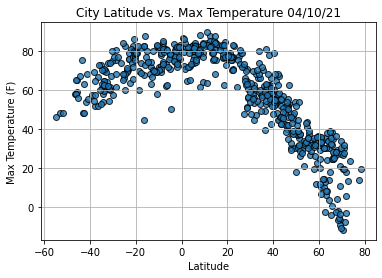

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

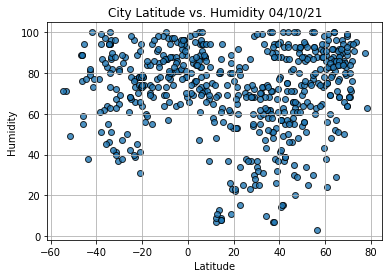

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

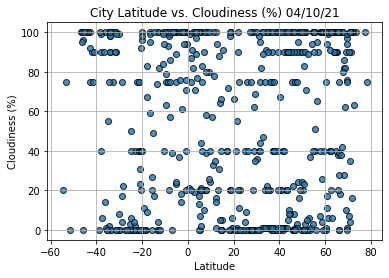

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

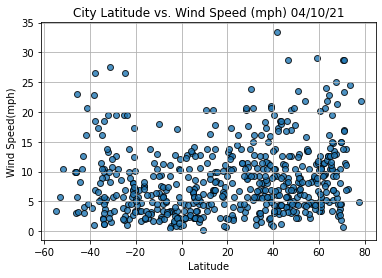

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed (mph) "+ time.strftime("%x"))
plt.ylabel("Wind Speed(mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

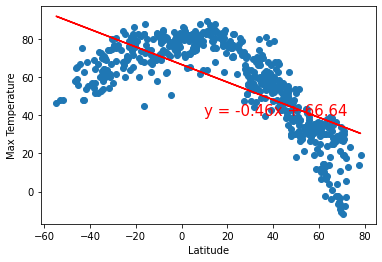

In [22]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, max_temps)

# Calculate the regression line maximum temperature from the slope and intercept.
regress_values = lats * slope + intercept

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot of the latitudes and maximum temprature.
plt.scatter(lats,max_temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.show()

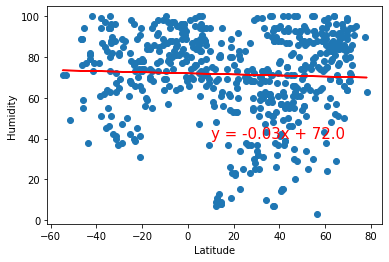

In [23]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, humidity)

# Calculate the regression line humidity from the slope and intercept.
regress_values = lats * slope + intercept

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot of the latitudes and humidity.
plt.scatter(lats,humidity)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

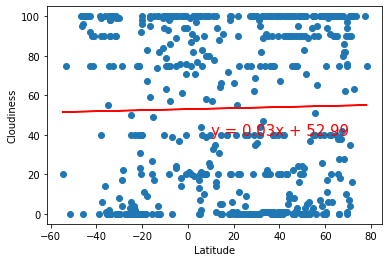

In [24]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, cloudiness)

# Calculate the regression line cloudiness from the slope and intercept.
regress_values = lats * slope + intercept

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot of the latitudes and cloudiness.
plt.scatter(lats,cloudiness)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

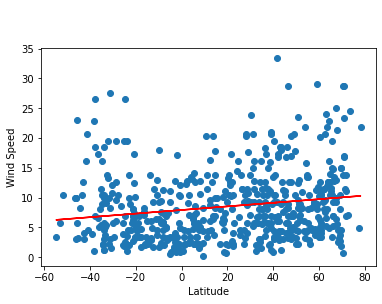

In [25]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, wind_speed)

# Calculate the regression line wind speed from the slope and intercept.
regress_values = lats * slope + intercept

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot of the latitudes and cloudiness.
plt.scatter(lats,wind_speed)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

In [44]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [45]:
index13 = city_data_df.loc[13]
index13

City                     Bengkulu
Country                        ID
Date          2021-04-11 01:02:31
Lat                       -3.8004
Lng                       102.266
Max Temp                    78.55
Humidity                       81
Cloudiness                     37
Wind Speed                   3.33
Name: 13, dtype: object

In [46]:
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3       True
4       True
       ...  
563     True
564    False
565     True
566     True
567     True
Name: Lat, Length: 568, dtype: bool

In [47]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bethel,US,2021-04-11 01:01:53,41.3712,-73.4140,64.40,63,1,3.44
2,Albany,US,2021-04-11 01:02:27,42.6001,-73.9662,66.99,55,100,2.86
3,Ayagoz,KZ,2021-04-11 01:02:28,47.9714,80.4392,30.20,86,24,17.00
4,Georgetown,MY,2021-04-11 00:59:13,5.4112,100.3354,82.00,94,20,2.30
6,Acapulco,MX,2021-04-11 00:59:35,16.8634,-99.8901,82.40,69,40,8.05


In [48]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

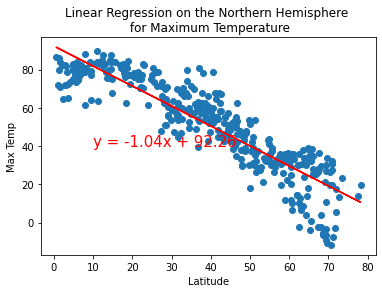

In [73]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function - plot_linear_regression(x_values, y_values, title, y_label, text_coordinates)
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

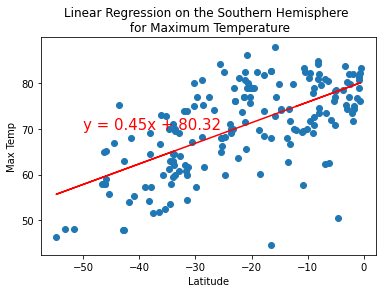

In [74]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,70))

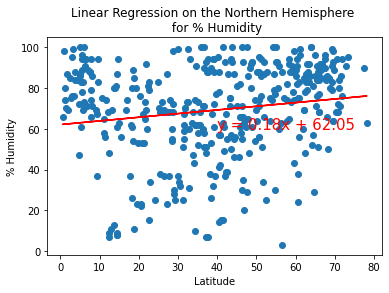

In [75]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,60))

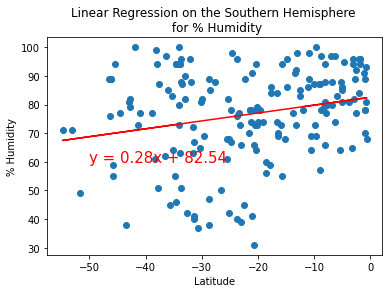

In [76]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,60))

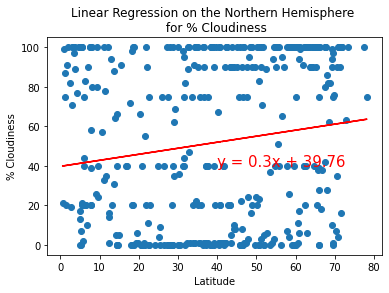

In [77]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(40,40))

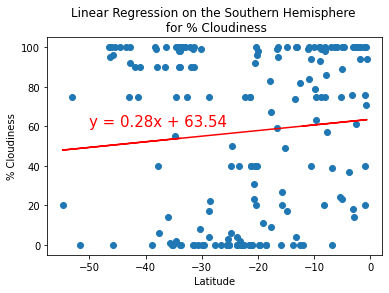

In [78]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

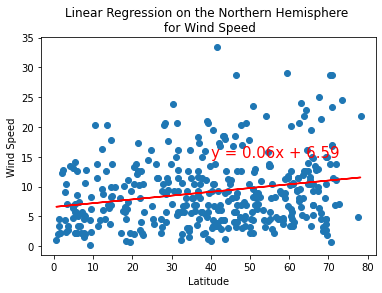

In [81]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,15))

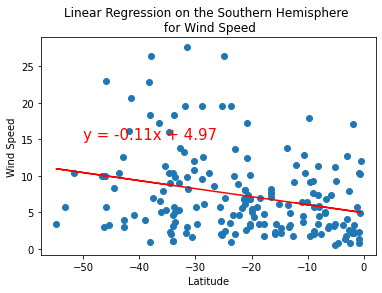

In [84]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,15))